<a href="https://colab.research.google.com/github/HamzahJE/ENGR-125_Files/blob/main/Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
# Use seaborn for pairplot
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.3.0


### **Importing the Data**

In [ ]:
url = 'http://drnam.org/pythonfiles/LifeExpectancy.csv'

column_names = ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
                'infant deaths', 'Alcohol', 'percentage expenditure', 
                'Hepatitis B', 'Measles', 'BMI', 'under-five deaths ', 
                'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
                'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
                
raw_dataset = pd.read_csv(url)
dataset = raw_dataset.copy()
dataset.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


### **Cleaning the data**

In [ ]:
dataset.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset=dataset.drop(['Status','Country'], axis = 1)

In [ ]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,2004,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,2000,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


### **Split the data into train and test**

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### **Inspect the data**

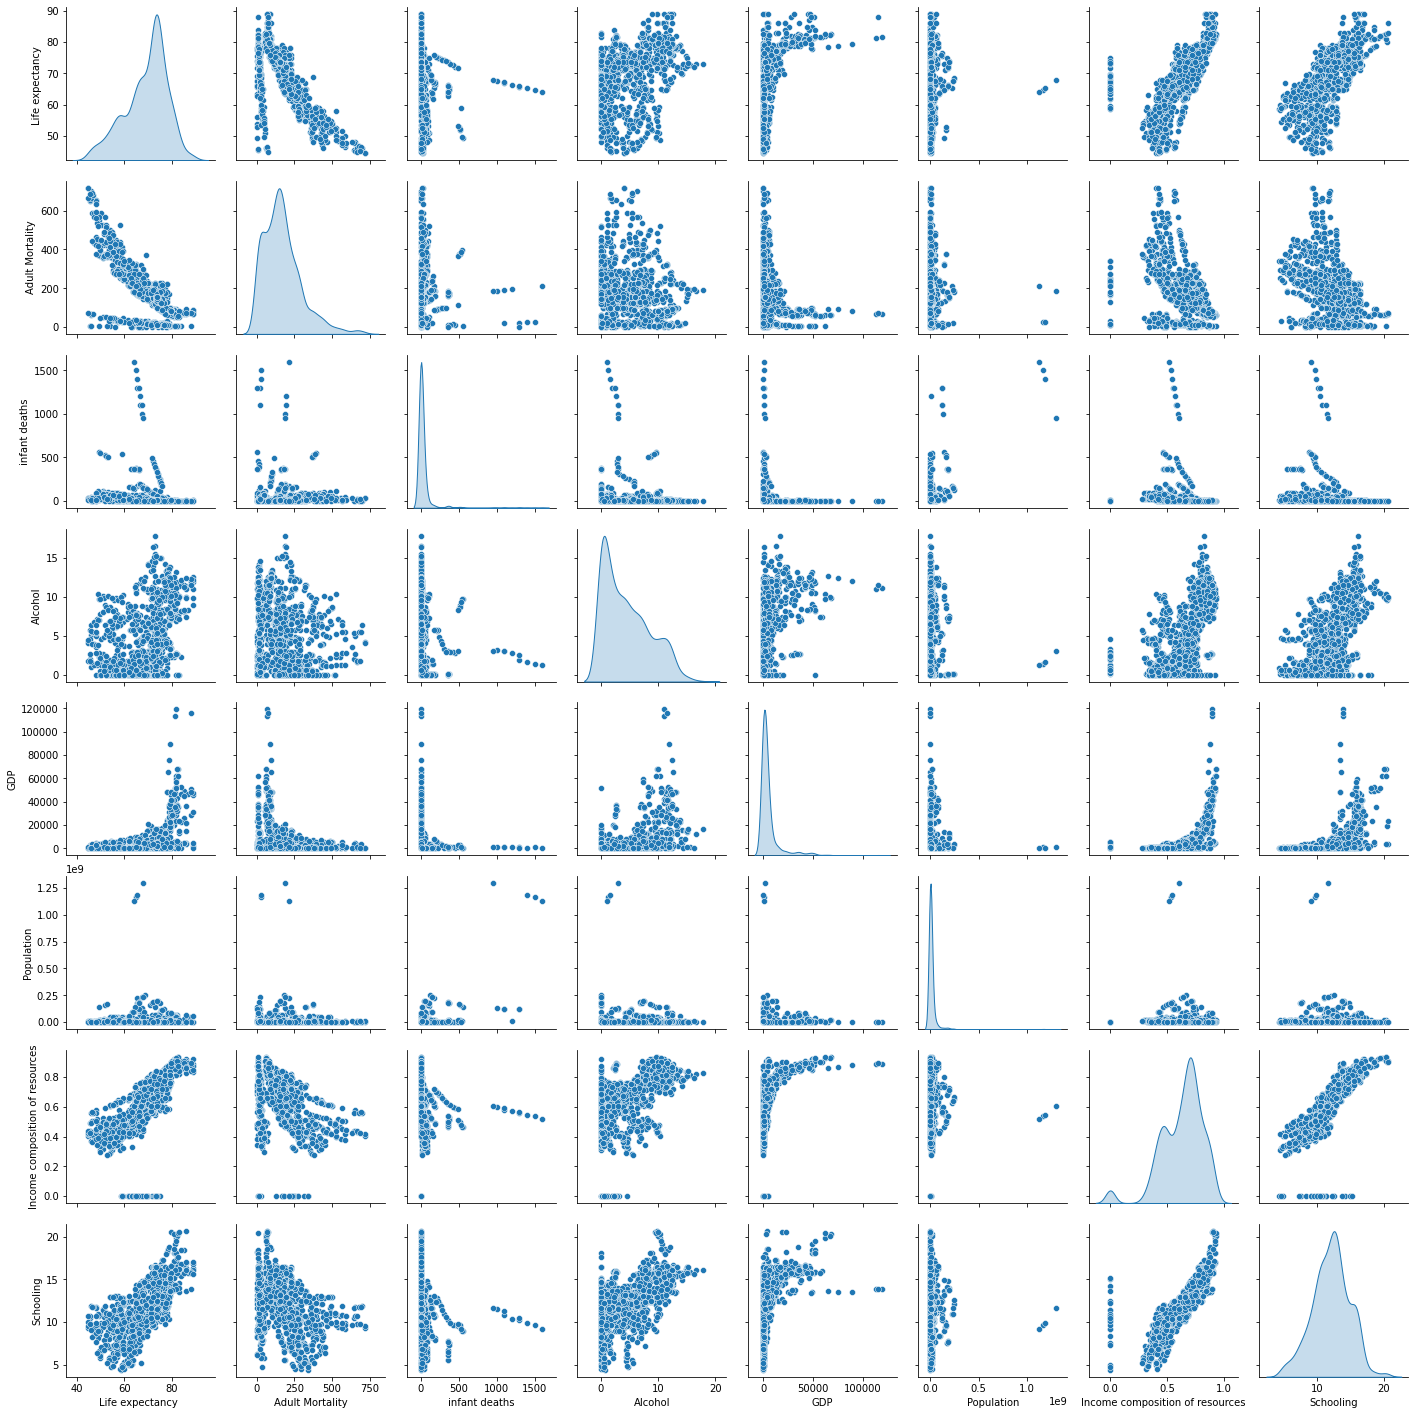

In [ ]:
sns.pairplot(train_dataset[['Life expectancy ', 'Adult Mortality',
                'infant deaths', 'Alcohol', 'GDP', 'Population', 'Income composition of resources', 'Schooling']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1319.0,2.007883e+03,4.072002e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Life expectancy,1319.0,6.918514e+01,8.902624e+00,44.50000,64.100000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1319.0,1.698514e+02,1.276983e+02,1.00000,78.000000,1.490000e+02,2.280000e+02,7.170000e+02
infant deaths,1319.0,3.454814e+01,1.256106e+02,0.00000,1.000000,3.000000e+00,2.300000e+01,1.600000e+03
Alcohol,1319.0,4.525959e+00,4.016759e+00,0.01000,0.860000,3.730000e+00,7.330000e+00,1.787000e+01
percentage expenditure,1319.0,7.231894e+02,1.797958e+03,0.00000,39.153841,1.496599e+02,5.199601e+02,1.702853e+04
Hepatitis B,1319.0,7.911221e+01,2.580167e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1319.0,2.506603e+03,1.107832e+04,0.00000,0.000000,1.500000e+01,3.945000e+02,1.314410e+05
BMI,1319.0,3.785042e+01,1.976842e+01,2.10000,19.500000,4.320000e+01,5.570000e+01,7.670000e+01
under-five deaths,1319.0,4.661334e+01,1.682738e+02,0.00000,1.000000,4.000000e+00,3.200000e+01,2.100000e+03


###**Split features from labels**

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Life expectancy ')
test_labels = test_features.pop('Life expectancy ')
train_features.tail()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2229,2003,225.0,0,6.54,86.427441,43.0,0,22.2,0,94.0,11.12,94.0,1.6,649.342153,148372.0,7.4,7.4,0.504,9.7
2257,2007,23.0,22,0.32,8.309153,94.0,11,2.3,36,93.0,4.72,94.0,0.7,95.397852,11873557.0,11.0,1.9,0.425,6.8
823,2010,191.0,2,2.36,469.390419,89.0,0,52.8,2,89.0,6.91,89.0,0.3,3474.392445,6164626.0,1.7,1.6,0.662,12.9
1388,2005,213.0,0,0.60,111.739213,5.0,0,72.1,0,74.0,1.60,79.0,0.1,1214.556667,92325.0,0.2,0.2,0.000,12.2
427,2004,378.0,24,5.72,11.226553,83.0,2,13.8,38,76.0,7.10,83.0,4.8,127.429665,7182451.0,8.4,8.4,0.279,5.2


### **Normalization**

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[    2007.883      169.851       34.548        4.526      723.189
       79.112     2506.604       37.85        46.613       83.864
        5.97        84.496        2.068     5725.717 15021572.
        4.829        4.929        0.632       12.103]


In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   2008.       427.         2.         6.56     476.86      94.
        0.        34.2        3.        96.         5.55      96.
       12.7     5623.38 1946351.         8.8        8.6        0.65
       12.1 ]]

Normalized: [[ 0.03  2.01 -0.26  0.51 -0.14  0.58 -0.23 -0.18 -0.26  0.55 -0.18  0.55
   1.72 -0.01 -0.18  0.86  0.78  0.08 -0.  ]]


###**Linear regression**

**One Variable**

In [ ]:
GDP= np.array(train_features['GDP'])
GDP_normalizer = preprocessing.Normalization(input_shape=[1,])
GDP_normalizer.adapt(GDP)

In [ ]:
GDP_model = tf.keras.Sequential([
    GDP_normalizer,
    layers.Dense(units=1)
])

GDP_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
GDP_model.predict(GDP[:10])

array([[-0.013],
       [-0.165],
       [ 0.397],
       [-0.585],
       [-0.613],
       [ 4.905],
       [-0.661],
       [-0.673],
       [-0.695],
       [ 0.193]], dtype=float32)

In [ ]:
GDP_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = GDP_model.fit(
    train_features['GDP'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 4.93 s, sys: 379 ms, total: 5.31 s
Wall time: 4.53 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,6.212232,6.025244,95
96,6.209119,6.003178,96
97,6.206304,6.022446,97
98,6.210557,6.018348,98
99,6.209652,6.016978,99


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Life expectancy]')
  plt.legend()
  plt.grid(True)

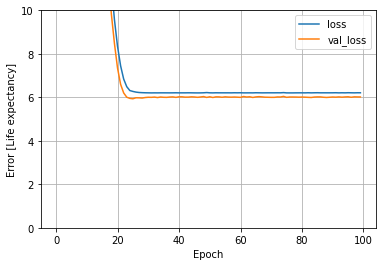

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['GDP_model'] = GDP_model.evaluate(
    test_features['GDP'],
    test_labels, verbose=0)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = GDP_model.predict(x)

In [ ]:
def plot_GDP(x, y):
  plt.scatter(train_features['GDP' ], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('GDP')
  plt.ylabel('Life expectancy')
  plt.legend()



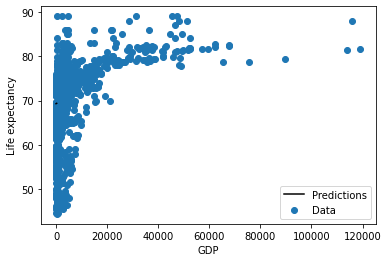

In [ ]:
plot_GDP(x, y)

**Multiple Inputs**

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

array([[-1.231],
       [ 0.318],
       [ 1.244],
       [-0.135],
       [-1.201],
       [-3.55 ],
       [-0.085],
       [-1.806],
       [-0.242],
       [ 0.388]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(19, 1) dtype=float32, numpy=
array([[ 0.253],
       [-0.17 ],
       [-0.541],
       [-0.358],
       [-0.475],
       [ 0.156],
       [-0.212],
       [ 0.167],
       [ 0.216],
       [ 0.474],
       [ 0.107],
       [-0.416],
       [-0.07 ],
       [-0.416],
       [ 0.544],
       [-0.424],
       [-0.52 ],
       [-0.018],
       [-0.335]], dtype=float32)>

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 4.98 s, sys: 389 ms, total: 5.37 s
Wall time: 4.4 s


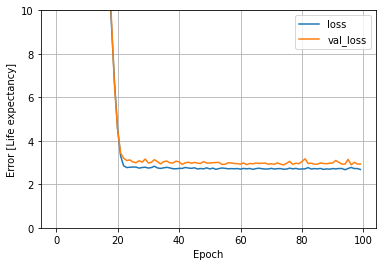

In [ ]:
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

## A DNN regression

**One Variable**

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_GDP_model = build_and_compile_model(GDP_normalizer)

In [ ]:
dnn_GDP_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
%%time
history = dnn_GDP_model.fit(
    train_features['GDP'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 5.95 s, sys: 495 ms, total: 6.45 s
Wall time: 5.09 s


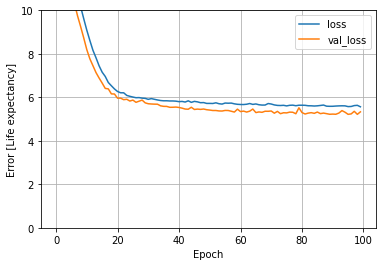

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_GDP_model.predict(x)

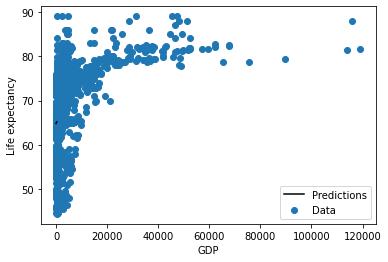

In [ ]:
plot_GDP(x, y)

In [ ]:
test_results['dnn_GDP_model'] = dnn_GDP_model.evaluate(
    test_features['GDP'], test_labels,
    verbose=0)

**Full Model**

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 19)                39        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1280      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 5,544
Trainable params: 5,505
Non-trainable params: 39
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.34 s, sys: 526 ms, total: 6.86 s
Wall time: 5.36 s


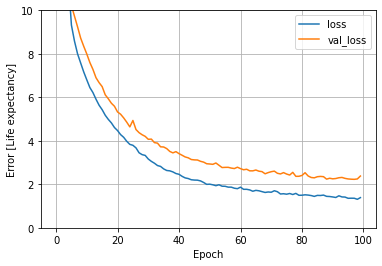

In [ ]:
plot_loss(history)

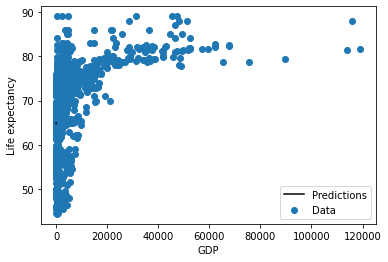

In [ ]:
x = tf.linspace(0.0, 80, 81)
y = dnn_GDP_model.predict(x)

plot_GDP(x, y)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

**Performance**

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [GDP]']).T

,Mean absolute error [GDP]
GDP_model,5.584302
linear_model,3.056673
dnn_GDP_model,5.366030
dnn_model,2.418357
reloaded,2.418357


**Make predictions**

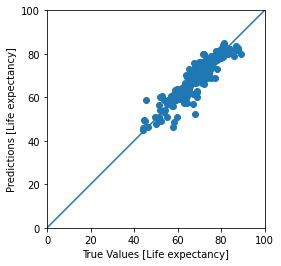

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Life expectancy]')
plt.ylabel('Predictions [Life expectancy]')
xlims = [0, 100]
ylims=[0, 100]
plt.xlim(xlims)
plt.ylim(ylims)
_ = plt.plot(xlims, ylims)


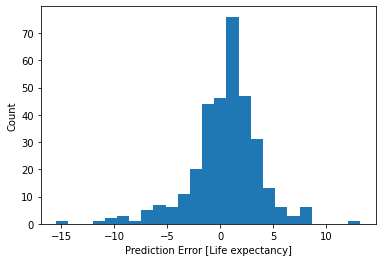

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Life expectancy]')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: dnn_model/assets


In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Life expectancy]']).T

,Mean absolute error [Life expectancy]
GDP_model,5.584302
linear_model,3.056673
dnn_GDP_model,5.366030
dnn_model,2.418357
reloaded,2.418357
